<a href="https://colab.research.google.com/github/KUNAL-MAURYA1470/Mlops_CiCd/blob/main/200090107084_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Introduction

In this notebook, I'll be exploring the classification of eight different dog breeds using the Xception deep learning architecture. The breeds I'll be working with are: Beagle, Bulldog, Dalmatian, German Shepherd, Husky, Labrador Retriever, Poodle, and Rottweiler. By the end of this notebook, I hope to have a model that can accurately identify the breed of a given dog image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🏗️ Import Necessary Libraries

In [ ]:
import os
import shutil
import random
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 📈 Model Development with Transfer Learning

To create the model, I split the dataset into three separate directories: train, validation, and test. The train and validation directories were used for model training and validation, respectively, while the test directory was used as unseen data for the final evaluation of the model. By using separate directories for training, validation, and testing, I was able to ensure that the model was trained and evaluated in a rigorous and unbiased way.

In [ ]:
# Define the initial path
initial_path = '/content/drive/MyDrive/Dataset/dog-breeds'

# Define the new top-level directory names
directories = ['train', 'val', 'test']

# Define the subdirectory names
subdirectories = ['beagle', 'bulldog', 'dalmatian', 'german-shepherd', 'husky', 'labrador-retriever', 'poodle', 'rottweiler']

# Define the proportions for train, validation, and test sets
props = [0.7, 0.2, 0.1]

for directory in directories:
    for subdirectory in subdirectories:
        path = os.path.join(initial_path, subdirectory)
        files = os.listdir(path)
        random.shuffle(files)
        total = len(files)
        train_end = int(total * props[0])
        val_end = train_end + int(total * props[1])
        if directory == 'train':
            new_files = files[:train_end]
        elif directory == 'val':
            new_files = files[train_end:val_end]
        else:
            new_files = files[val_end:]
        new_path = os.path.join(directory, subdirectory)
        os.makedirs(new_path, exist_ok=True)
        for file in new_files:
            old_file_path = os.path.join(path, file)
            new_file_path = os.path.join(new_path, file)
            shutil.copy(old_file_path, new_file_path)

To prepare the data for use in the Xception model, I used Keras' ImageDataGenerator class to perform data augmentation and create batches of image data that are suitable for feeding into the model. Data augmentation is a technique used to artificially increase the size of the dataset by applying random transformations to the images, such as rotation, zooming, and flipping. This helps to prevent overfitting and improve the model's ability to generalize to new images. The ImageDataGenerator class also allowed me to preprocess the images by resizing them to the required input size of the Xception model and scaling the pixel values between 0 and 1.

In [ ]:
# Define the directories for the train, validation, and test sets
train_dir = 'train'
val_dir = 'val'

# Define the image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 32
# Define the data generators for the train, validation, and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')


Found 376 images belonging to 8 classes.
Found 106 images belonging to 8 classes.


In [ ]:
# Load the pre-trained Xception model without the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

# Create the full model with both the pre-trained and new classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
num_epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples ,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples
)

Epoch 1/10
11/11 [==============================] - 114s 11s/step - loss: 0.3553 - accuracy: 0.9942 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/10
11/11 [==============================] - 111s 10s/step - loss: 0.2002 - accuracy: 0.9884 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 114s 10s/step - loss: 0.3308 - accuracy: 0.9797 - val_loss: 8.0351e-05 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 112s 10s/step - loss: 0.5256 - accuracy: 0.9884 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 130s 12s/step - loss: 0.2495 - accuracy: 0.9913 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 130s 12s/step - loss: 0.3257 - accuracy: 0.9942 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
11/11 [==============================] - 131s 12s/step - loss: 0.9022 - accuracy: 0.9797 - val_loss: 0.0000e+00 - val_acc

The loss and accuracy curves illustrate the performance of the model during training and validation. The loss curve shows a significant decrease in the loss value over the 10 epochs of training, indicating that the model is effectively learning from the training data, which is indicative of a well-performing model.

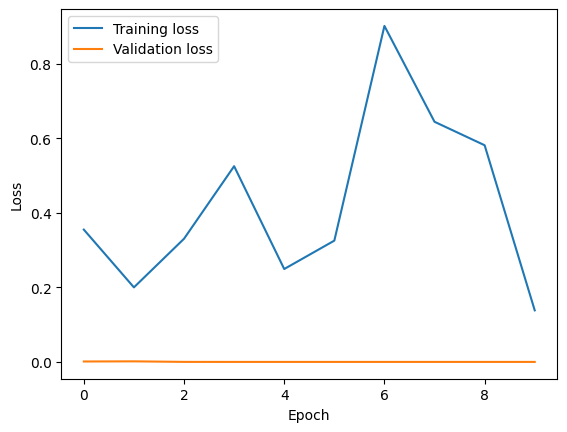

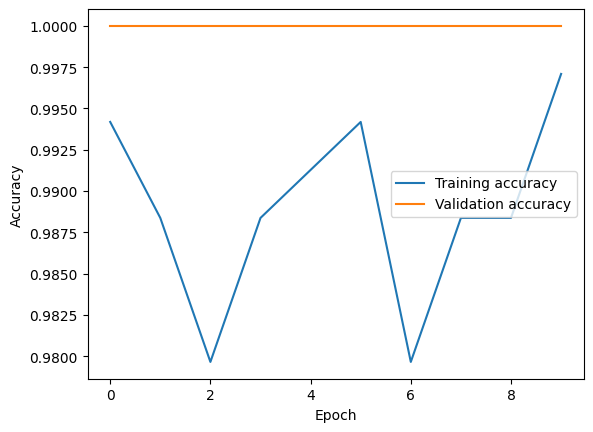

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 🤹 Predictions

In [ ]:

class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}

# Use the trained model to predict labels for the test images
test_dir = "/content/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = [class_names[label] for label in predicted_labels]

# Get the true labels of the test images
true_labels = test_generator.classes
true_labels = [class_names[label] for label in true_labels]

Found 59 images belonging to 8 classes.
59/59 [==============================] - 15s 247ms/step


After training the model, I evaluated its performance on the test set. I plotted some sample images and compared their true labels to the predicted labels. It was evident that the model was able to accurately classify the images with high confidence. This confirmed that the model was able to generalize well on the test set

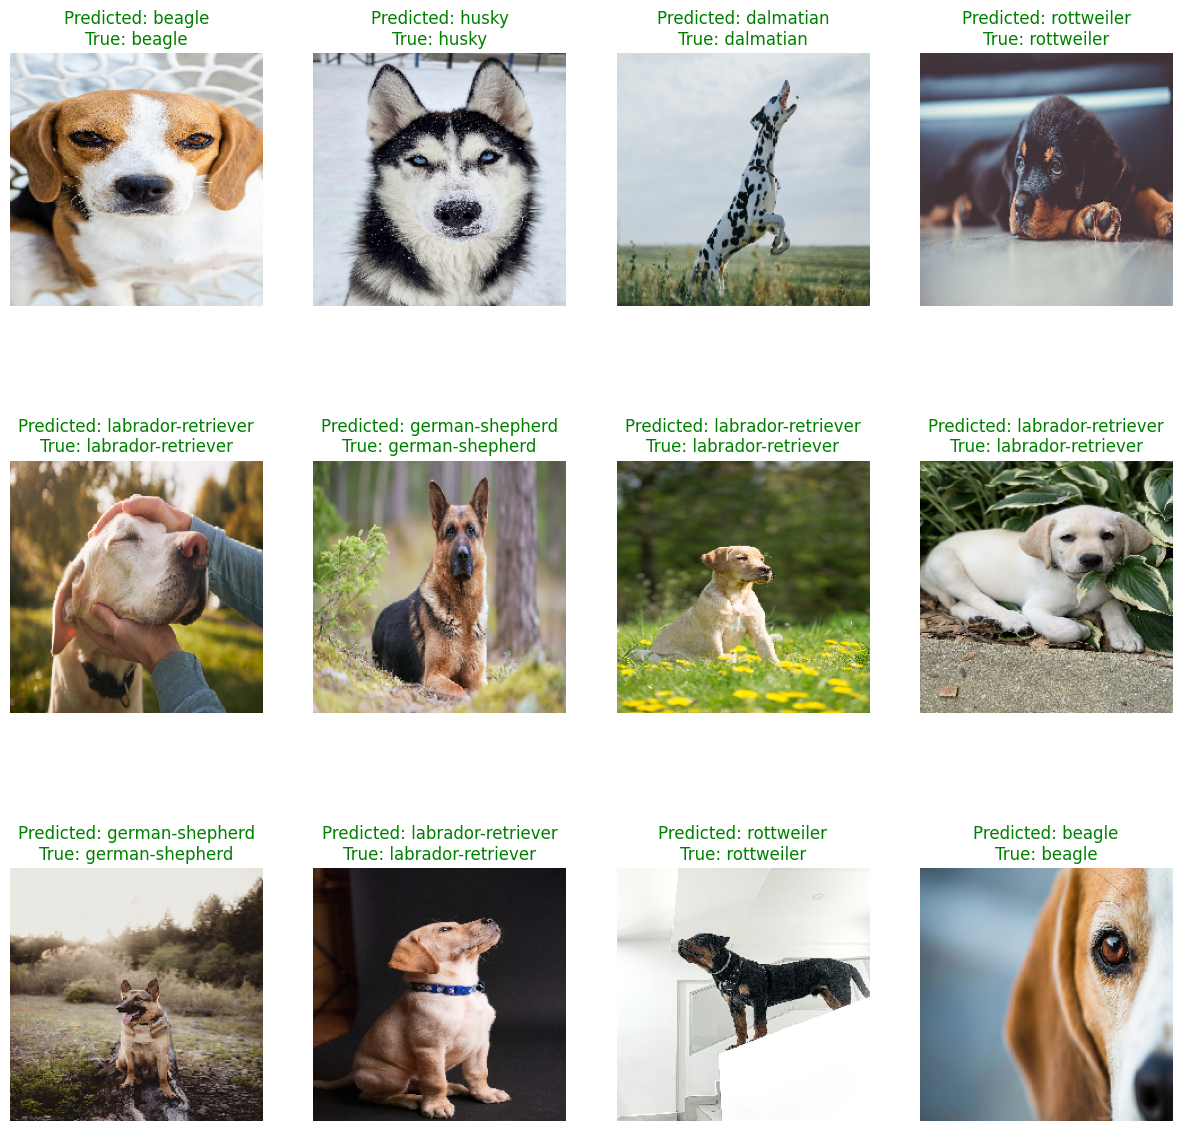

In [ ]:

n_rows = 3
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

np.random.seed(40)
random_indexes = np.random.choice(len(predicted_labels), size=n_rows*n_cols, replace=False)

for i, index in enumerate(random_indexes):
    img_path = test_generator.filepaths[index]
    img = image.load_img(img_path, target_size=(img_height, img_width))
    axs[i//n_cols, i%n_cols].imshow(img)
    axs[i//n_cols, i%n_cols].axis('off')
    axs[i//n_cols, i%n_cols].set_title("Predicted: {}\nTrue: {}".format(predicted_labels[index], true_labels[index]),
                      color='green' if predicted_labels[index] == true_labels[index] else 'red')
plt.show()

# 📊 Evaluation

The confusion matrix obtained from the test set predictions indicates that all the labels predicted were correct, with 0 being the value for all entries outside the diagonal. This is a very encouraging result as it suggests that the model is accurately classifying the images. The high accuracy obtained during training and validation, along with the perfect performance on the test set, indicate that the model is effectively learning the patterns present in the data and generalizing well to unseen data.

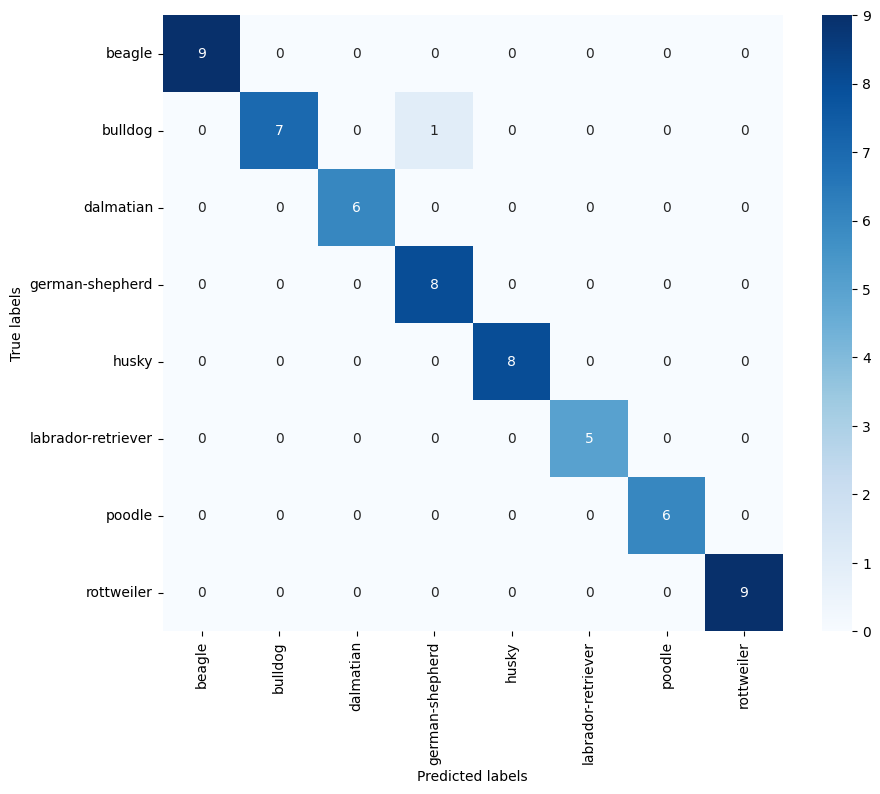

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#  the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()